<a href="https://colab.research.google.com/github/asadali163/Time-Series-Experiments/blob/main/codebase/ARIMA(Champange).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O champane.csv https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2024-07-13 06:14:08--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘champane.csv’

champane.csv        100%[===================>]   1.56K  --.-KB/s    in 0s      

2024-07-13 06:14:08 (23.1 MB/s) - ‘champane.csv’ saved [1598/1598]



In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

from pmdarima.arima import auto_arima

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv('champane.csv', index_col = 'Month', parse_dates = True)
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [ ]:
# Rename column to Sales
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'}, inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [ ]:
df = df[:-2]

In [ ]:
df.isnull().sum()

Sales    0
dtype: int64

<Axes: xlabel='Month'>

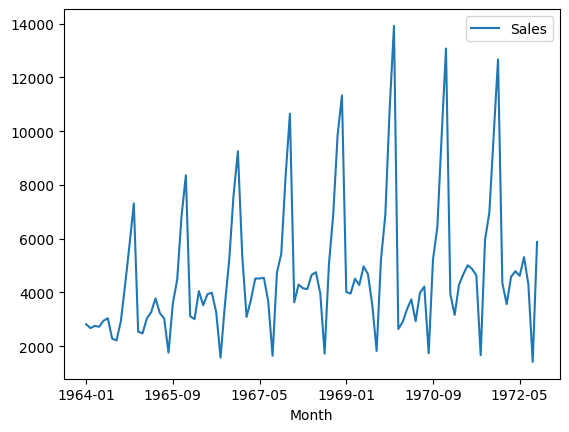

In [ ]:
df.plot()

Function to check the stationarity of the dataset

In [ ]:
def test_stationarity(timeseries):
  result = adfuller(timeseries)
  print("Test Hypothesis: ", result[0])
  print("p-value: ", result[1])
  if (result[1] <= 0.05):
    print("Stationary")
  else:
    print("Non-Stationary")

In [ ]:
test_stationarity(df['Sales'])

Test Hypothesis:  -1.8335930563276215
p-value:  0.36391577166024586
Non-Stationary


Finding the first difference and then check the stationarity

In [ ]:
first_diff = df['Sales'].diff()[1:]
first_diff.head()

Month
1964-02   -143.0
1964-03     83.0
1964-04    -34.0
1964-05    225.0
1964-06     90.0
Name: Sales, dtype: float64

<Axes: xlabel='Month'>

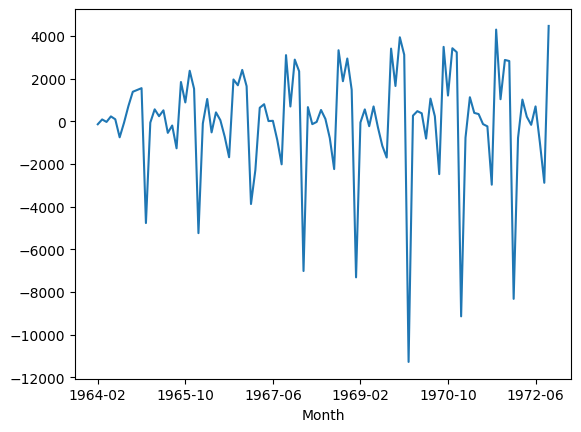

In [ ]:
first_diff.plot()

In [ ]:
test_stationarity(first_diff)

Test Hypothesis:  -7.189896448050999
p-value:  2.519620447387081e-10
Stationary


<Axes: xlabel='Month'>

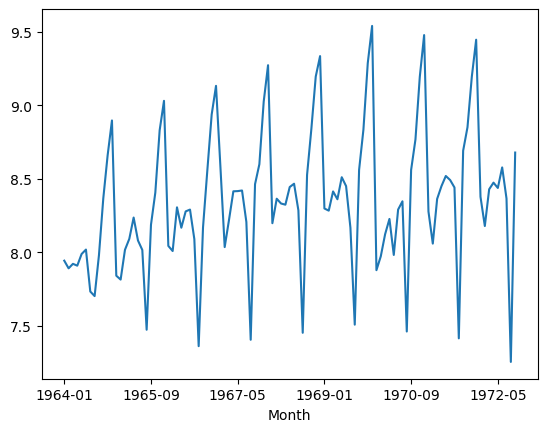

In [ ]:
log_ret = np.log(df['Sales'])
log_ret.plot()

In [ ]:
test_stationarity(log_ret)

Test Hypothesis:  -2.2551186012844235
p-value:  0.18685173111687442
Non-Stationary


In [ ]:
test_stationarity(log_ret.diff()[1:])

Test Hypothesis:  -4.460914465253654
p-value:  0.00023121404649533928
Stationary


As we can see that the first difference is required, so most probably the value of I should be 1 for this time series data.<br>
Also note that there is clear trend in data. So the data is seasonal

##### Let's now work on the acf and pacf plots

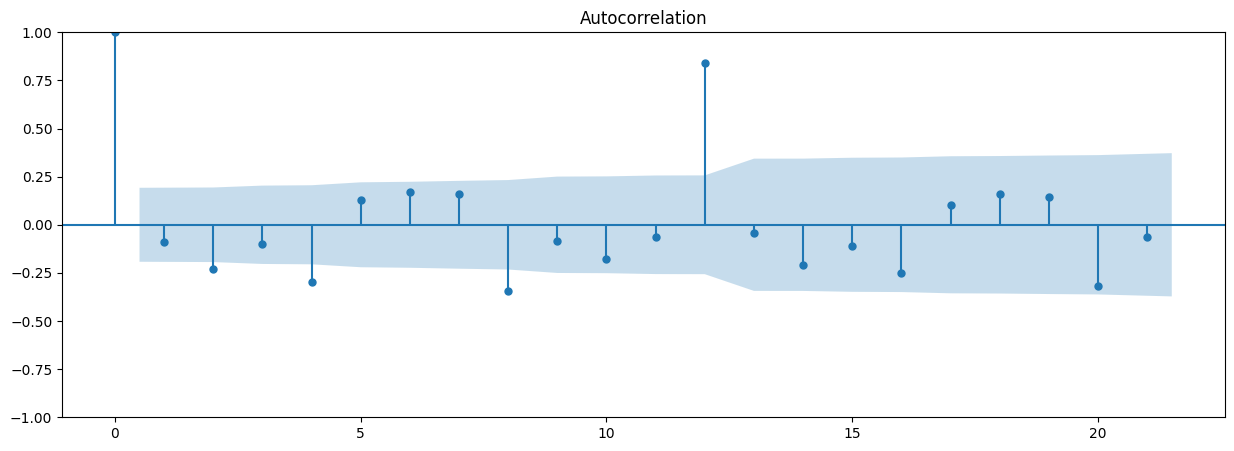

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plot_acf(first_diff, ax=ax);

Here the 12 represent the seasonality

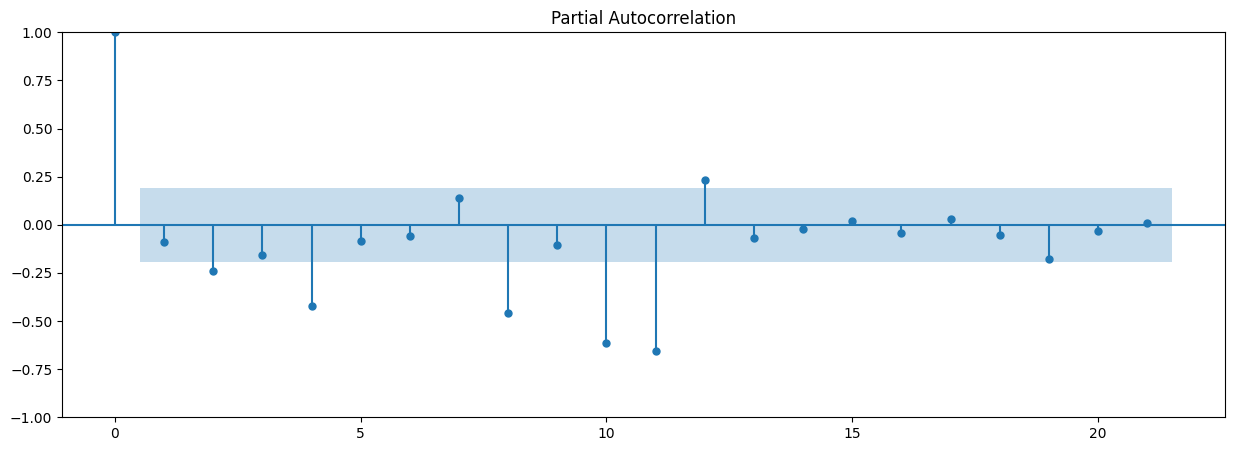

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plot_pacf(first_diff, ax=ax);

The value for this should be around 4, or 8, or 10

#### Let's check now with auto arima model

In [ ]:
N_test = 15
train = df[:-N_test]
test = df[-N_test:]

In [ ]:
model = auto_arima(train, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1269.584, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1267.527, Time=0.63 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1268.503, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1278.764, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1269.338, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1268.127, Time=0.44 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1268.608, Time=1.01 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1268.622, Time=0.15 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1270.063, Time=0.78 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1270.074, Time=0.11 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1269.511, Time=0.86 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1270.156, Time=0.23 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1268.918, Time=0.14 sec
 ARIMA(2,0,1)(1,1,0)[12]

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -629.763
Date:                            Sat, 13 Jul 2024   AIC                           1267.527
Time:                                    06:39:49   BIC                           1276.953
Sample:                                01-01-1964   HQIC                          1271.300
                                     - 06-01-1971                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    321.3825    103.705      3.099      0.002     118.125     524.640
ar.L1          0.2155      0.072      2.992      0.003       0.074       0.357
ar.S.L12      -0.2016      0.092     -2.184      0.029      -0.382      -0.021
sigma2       5.75e+05   7.37e+04      7.800      0.000    4.31e+05    7.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 4.35
Prob(Q):                              0.49   Prob(JB):                         0.11
Heteroskedasticity (H):               2.15   Skew:                            -0.23
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
def plot_result(model, fulldata, train, test):
  params = model.get_params()
  d = params['order'][1]
  train_pred = model.predict_in_sample(start=d, end=-1)
  pred, confint = model.predict(n_periods=N_test, return_conf_int=True)

  fig, ax = plt.subplots(figsize=(15,6))
  ax.plot(fulldata.index, fulldata, label='data')
  ax.plot(train.index[d:], train_pred,  label='fitted')
  ax.plot(test.index, pred, label='prediction')
  ax.fill_between(test.index, confint[:,0], confint[:,1], color='b', alpha=0.3)
  ax.legend()
  plt.show();

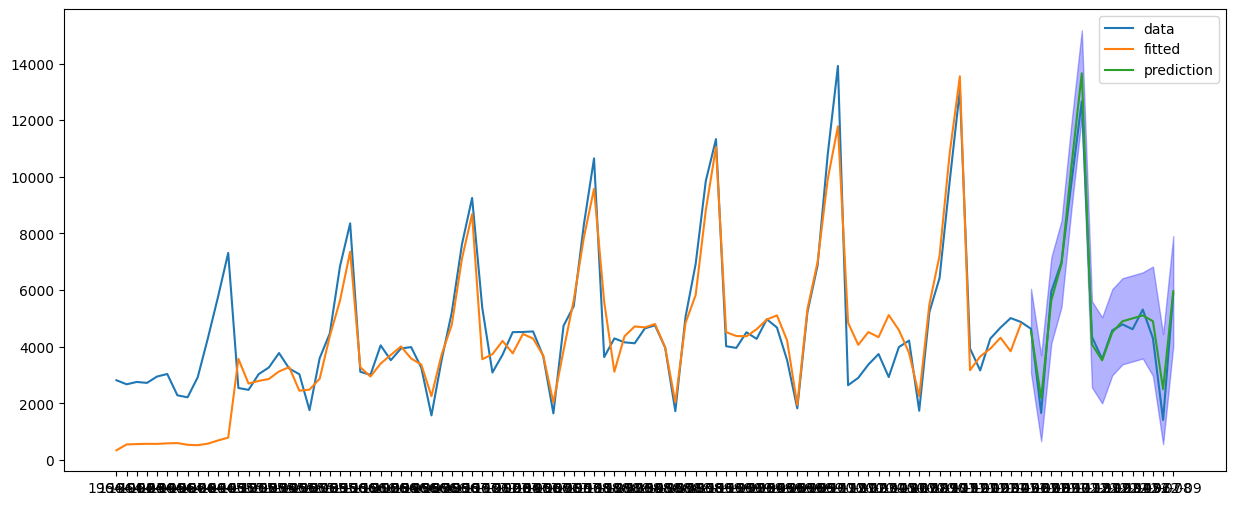

In [ ]:
plot_result(model, df['Sales'], train, test)

In [ ]:
# Plot only tests
def plot_test(model, test):
  pred, confint = model.predict(n_periods=N_test, return_conf_int=True)
  fig, ax = plt.subplots(figsize=(15,6))
  ax.plot(test.index, test, label="Test")
  ax.plot(test.index, pred, label='Prediction')
  ax.fill_between(test.index, confint[:,0], confint[:,1], color='b', alpha=0.3)
  ax.legend()
  plt.show();

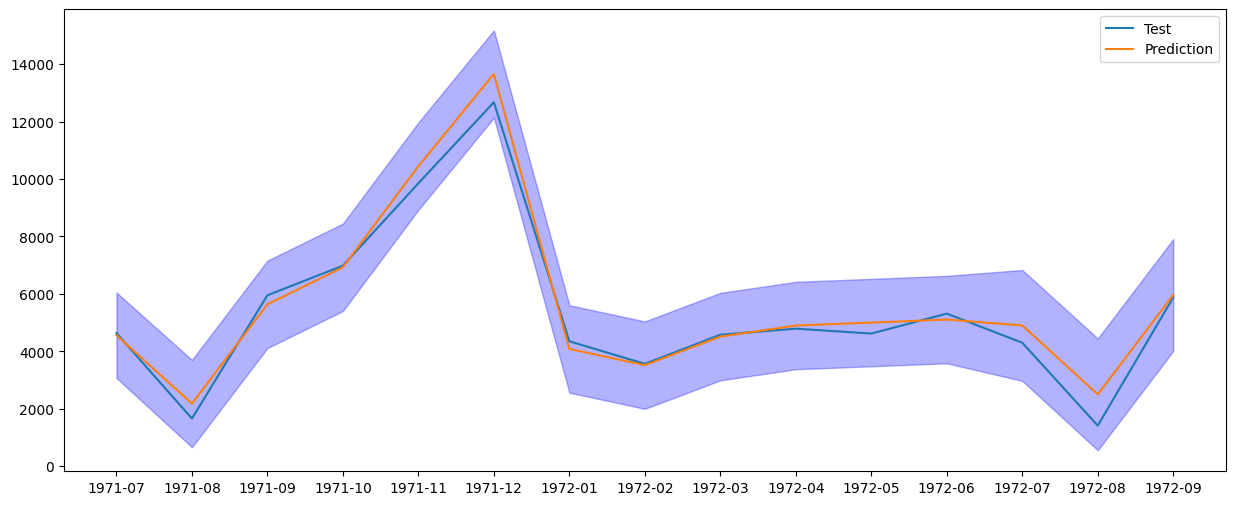

In [ ]:
plot_test(model, test)

#### Let's check the RMSE score

In [ ]:
pred = model.predict(n_periods=N_test)


In [ ]:
r2_score(test, pred)

0.968864831423221

## Now let's find the best non-seasonal model with grid search (stepwise=False)

In [ ]:
non_seasonal_model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False, max_p=12, max_q=2, max_order=16)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1652.756, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1653.924, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1654.331, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1651.110, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1650.678, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1626.748, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1630.457, Time=0.40 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1636.213, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1637.824, Time=0.16 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1624.454, Time=0.54 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

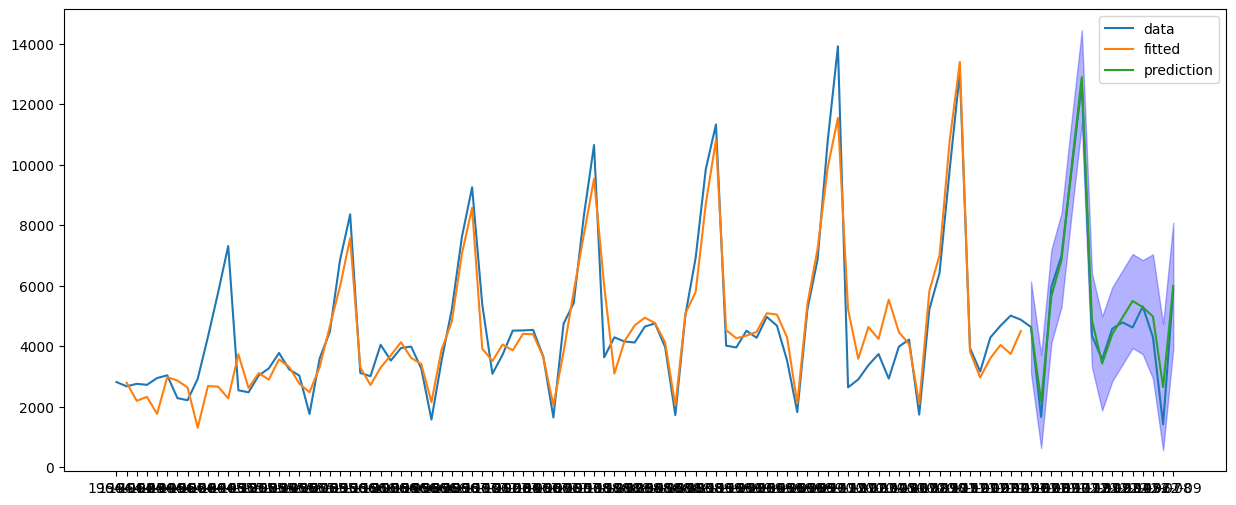

In [ ]:
plot_result(non_seasonal_model, df['Sales'], train, test)

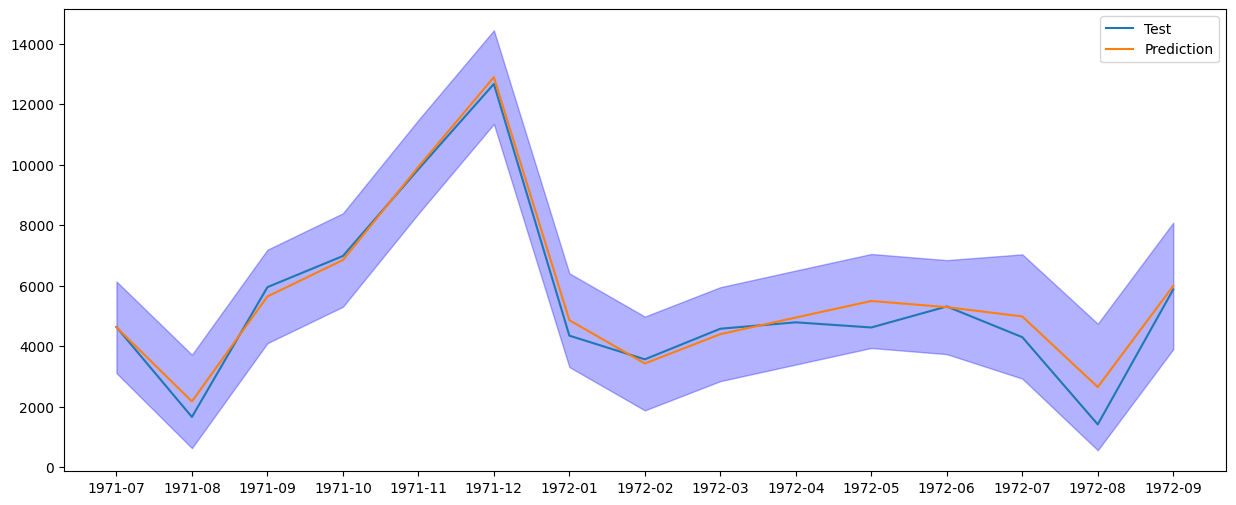

In [ ]:
plot_test(non_seasonal_model, test)

In [ ]:
pred = non_seasonal_model.predict(n_periods=N_test)
r2_score(test, pred)

0.9687431936873984

As we see it is not always necessary to have a seasonal model for seasonal data. Non seasonal also works